# *Introduction*

------------
> *Our client for this project is an Airline Company- **Fly High**.*

[![FH](https://www.insaid.co/wp-content/uploads/2021/05/flyhigh-logo.png "FH")](https://www.insaid.co/wp-content/uploads/2021/05/flyhigh-logo.png "FH")

•	Due to fierce competition in the airline industry, the company needs to focus on the passenger's experience and satisfaction.

•	Customer feedback, in particular, is critical since it is an outcome measurement for business performance.

•	So, they need to analyze the data of the passenger's travel history.

•	One of the key measurements in this process is whether the passenger feels satisfied or not.

---------------

# *Problem Statement*

------------
------------

Currently, they have a manual process to analyze the customer satisfaction based on the number of feedback and complaint mail that they receive.
The current process suffers from the following problems:


>  •	Analyzing the data of passengers manually and to understand whether a passenger is satisfied or not is a tedious task.




> •	This process needs to be repeated every time they receive some feedback.
The company has hired you as data science consultants.

They want to automate the process of predicting the passenger satisfaction based on the travel history data collected by the airline company

Our key responsibility is to build the most efficient model with the highest accuracy for resolving this issue.


---------------


# *Dataset Feature Description*

The Dataset contains the following columns:


|**Column Name**|**Description**|
| ------------- |:-------------                                               :| 
| Id | Unique Id  |
|Gender|Gender of the Passenger|
|Customer Type|If the customer is loyal or disloyal|
|Age|Age of the customer|
|Type of Travel|If the travel is for a business or a personal purpose|
|Class|Class of the aircraft in which the customer is travelling|
|Flight Distance|Distance covered by the flight|
|Inflight wifi service|If there is inflight wifi service or not|
|Departure/Arrival time convenient|Rating by the customer for Departure/Arrival Time|
|Ease of Online booking|Rating by the customer for this facility|
|Gate location|Rating by the customer for this facility|
|Food and drink|Rating by the customer for this facility|
|Online boarding|Rating by the customer for this facility|
|Seat comfort|Rating by the customer for this facility|
|Inflight entertainment|Rating by the customer for this facility|
|On-board service|Rating by the customer for this facility|
|Leg room service|Rating by the customer for this facility|
|Baggage handling|Rating by the customer for this facility|
|Checkin service|Rating by the customer for this facility|
|Inflight service|Rating by the customer for this facility|
|Cleanliness|Rating by the customer for this facility|
|Departure Delay in Minutes|Rating by the customer for this facility|
|Arrival Delay in Minutes|Rating by the customer for this facility|
|satisfaction|If the passenger is satisfied or not|
|-----------------------------------------------------------------------|-----------------------------------------------------------------------------------------| 



# *Importing all Libraries*

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport 
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import chi2_contingency

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# *Load the Input files*

In [116]:
test = pd.read_csv('https://raw.githubusercontent.com/sm24abr/Data_Repo/main/AirCustSatisfaction/cust_test.csv')
train = pd.read_csv('https://raw.githubusercontent.com/sm24abr/Data_Repo/main/AirCustSatisfaction/cust_train.csv')

In [117]:
test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,23509,Male,Loyal Customer,41,Business travel,Eco,303,5,3,3,...,5,5,4,3,3,5,5,5,0,0.0
1,31011,Female,Loyal Customer,18,Business travel,Business,391,1,5,5,...,1,1,4,3,3,1,4,1,17,17.0
2,29345,Female,Loyal Customer,13,Personal Travel,Eco Plus,569,2,4,2,...,1,1,5,4,4,5,5,1,0,0.0
3,50242,Male,disloyal Customer,23,Business travel,Eco,109,1,0,1,...,1,3,2,5,5,3,1,3,0,0.0
4,22244,Male,Loyal Customer,23,Personal Travel,Business,83,4,5,0,...,5,5,3,5,4,3,5,5,0,0.0


In [118]:
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,51032,Female,Loyal Customer,30,Personal Travel,Eco,193,3,4,0,...,5,4,5,3,4,4,5,0,0.0,neutral or dissatisfied
1,54504,Female,Loyal Customer,51,Business travel,Eco,925,2,1,1,...,2,2,2,2,3,2,3,47,29.0,neutral or dissatisfied
2,13387,Male,disloyal Customer,27,Business travel,Eco,505,0,0,0,...,1,5,5,2,3,2,1,0,0.0,satisfied
3,17388,Female,Loyal Customer,52,Business travel,Business,2953,2,2,2,...,5,5,5,5,4,5,5,10,2.0,satisfied
4,91598,Female,disloyal Customer,15,Business travel,Eco,1352,4,4,4,...,2,4,3,5,3,5,2,0,0.0,satisfied


In [119]:
train['satisfaction'].value_counts()

neutral or dissatisfied    47004
satisfied                  36119
Name: satisfaction, dtype: int64

In [120]:
test['Departure Delay in Minutes'].value_counts()

0      11691
1        608
2        444
3        408
5        339
       ...  
338        1
391        1
304        1
263        1
344        1
Name: Departure Delay in Minutes, Length: 311, dtype: int64

In [121]:
test['Arrival Delay in Minutes'].value_counts()

0.0      11606
1.0        446
2.0        424
3.0        400
4.0        357
         ...  
306.0        1
386.0        1
359.0        1
404.0        1
281.0        1
Name: Arrival Delay in Minutes, Length: 316, dtype: int64

# *Data Information*

In [122]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20781 entries, 0 to 20780
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 20781 non-null  int64  
 1   Gender                             20781 non-null  object 
 2   Customer Type                      20781 non-null  object 
 3   Age                                20781 non-null  int64  
 4   Type of Travel                     20781 non-null  object 
 5   Class                              20781 non-null  object 
 6   Flight Distance                    20781 non-null  int64  
 7   Inflight wifi service              20781 non-null  int64  
 8   Departure/Arrival time convenient  20781 non-null  int64  
 9   Ease of Online booking             20781 non-null  int64  
 10  Gate location                      20781 non-null  int64  
 11  Food and drink                     20781 non-null  int

In [123]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83123 entries, 0 to 83122
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 83123 non-null  int64  
 1   Gender                             83123 non-null  object 
 2   Customer Type                      83123 non-null  object 
 3   Age                                83123 non-null  int64  
 4   Type of Travel                     83123 non-null  object 
 5   Class                              83123 non-null  object 
 6   Flight Distance                    83123 non-null  int64  
 7   Inflight wifi service              83123 non-null  int64  
 8   Departure/Arrival time convenient  83123 non-null  int64  
 9   Ease of Online booking             83123 non-null  int64  
 10  Gate location                      83123 non-null  int64  
 11  Food and drink                     83123 non-null  int

**Observations**:
----------------

> **Train Dataset**
     - The train dataset has total **24 features** : **1 float64** datatype feature(*Arrival Delay in Minutes*), **5 object** datatype features (*Gender, gender, Customer Type, Type of Travel,Class and satisfaction*)  and remaining **18 int64** datatype features.

> **Test Dataset**
     - The test dataset has total **23 features** : **1 float64** datatype feature(*Arrival Delay in Minutes*), **4 object** datatype features (*Gender, gender, Customer Type, Type of Travel and Class*)  and remaining **18 int64** datatype features. 

- There are **Null** values present in the column: "Arrival Delay in Minute" for both datasets.

- Each feature seems to have correct data type, except for the column - **Arrival Delay in Minutes** in both datasets. It would be better if we created a new column with unit Hours and drop the original column later.  

# *Data Description*

In [124]:
test.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,20781.000000,20781.000000,20781.000000,20781.000000,20781.000000,20781.000000,20781.000000,20781.000000,20781.000000,20781.000000,20781.000000,20781.000000,20781.000000,20781.000000,20781.000000,20781.000000,20781.000000,20781.000000,20722.000000
mean,64734.896492,39.494105,1184.494923,2.718204,3.052404,2.758963,2.972186,3.189500,3.240508,3.425822,3.338819,3.377268,3.349646,3.621914,3.288677,3.626678,3.266349,15.219864,15.640817
std,37455.816609,15.176537,991.162378,1.319284,1.517431,1.390460,1.271853,1.325687,1.343898,1.322110,1.337282,1.290675,1.324557,1.188742,1.267898,1.184796,1.306951,38.713444,39.576280
min,3.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,32489.000000,27.000000,421.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,64792.000000,40.000000,835.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97095.000000,51.000000,1739.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,13.000000
max,129870.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,978.000000,970.000000


In [125]:
train.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,82872.000000
mean,64971.539574,39.351106,1190.686753,2.732553,3.062269,2.756385,2.978057,3.205286,3.252842,3.442790,3.362992,3.383636,3.351407,3.634313,3.308194,3.643865,3.291351,14.714556,15.063121
std,37465.886717,15.099487,998.640016,1.329950,1.526983,1.401047,1.279064,1.330482,1.350905,1.318317,1.331880,1.287778,1.313365,1.178930,1.264747,1.173351,1.313560,38.108874,38.475487
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32552.500000,27.000000,413.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64864.000000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97430.500000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [126]:
test.describe(include = 'O')

,Gender,Customer Type,Type of Travel,Class
count,20781,20781,20781,20781
unique,2,2,2,3
top,Female,Loyal Customer,Business travel,Business
freq,10610,17008,14345,9974


In [127]:
train.describe(include = 'O')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,83123,83123,83123,83123,83123
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,42117,67915,57310,39691,47004


In [128]:
test.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


id                                   0.005261
Age                                  0.003280
Flight Distance                      1.112604
Inflight wifi service                0.047093
Departure/Arrival time convenient   -0.330145
Ease of Online booking              -0.018627
Gate location                       -0.056956
Food and drink                      -0.145817
Online boarding                     -0.438572
Seat comfort                        -0.468588
Inflight entertainment              -0.355928
On-board service                    -0.421198
Leg room service                    -0.353481
Baggage handling                    -0.674065
Checkin service                     -0.353501
Inflight service                    -0.684252
Cleanliness                         -0.289092
Departure Delay in Minutes           5.793870
Arrival Delay in Minutes             5.733458
dtype: float64

In [129]:
train.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


id                                   0.002264
Age                                 -0.006553
Flight Distance                      1.108657
Inflight wifi service                0.038675
Departure/Arrival time convenient   -0.335497
Ease of Online booking              -0.018196
Gate location                       -0.059396
Food and drink                      -0.152690
Online boarding                     -0.457685
Seat comfort                        -0.486340
Inflight entertainment              -0.367411
On-board service                    -0.419734
Leg room service                    -0.349383
Baggage handling                    -0.677718
Checkin service                     -0.367859
Inflight service                    -0.691739
Cleanliness                         -0.302929
Departure Delay in Minutes           6.980063
Arrival Delay in Minutes             6.829916
dtype: float64

**Observations**:
----------------
> **Train Dataset**
   - The data in columns: **Departure Delay in Minutes** and **Arrival Delay in Minutes** is highly right skewed data.

     
> **Test Dataset**
   - The data in columns: **Departure Delay in Minutes** and **Arrival Delay in Minutes** is highly right skewed data.
    
>  It shows that most people prefer this airline while travelling for **Business purposes.** Maximum no. of passengers are **females** and mostly adults.

>  Most of the passengers seem to be dissatisfied or have a neutral experience using this airline.  

>  We have to perform label encoding for the categorical variables to implement ML models.

# *Data Pre-Profiling*

## **Pre Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [130]:
# profile = ProfileReport(df = train)
# profile.to_file(output_file = 'Pre Profiling Report.html')
# print('Accomplished!')

**Observations:**

- There are **24 features** with **83123 unique observations** in the dataset.Total memory used is **15.2 MB**.

- Dataset has **no duplicate rows**.

- **251 cells** in column: **Arrival Delay in Minutes** have **missing** values. The data in the column is highly skewed data. 

- The **female** passengers are higher than **males.** 


# *Data Preparation*

## **Missing Values Imputation**

**Test Dataset**



In [131]:
test.isna().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             59
dtype: int64

**Train Dataset**

In [132]:
train.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             251
satisfaction                           0
dtype: int64

In [133]:
# The missing values in **Arrival Delay in Minutes** column for both train and test datasets have been replaced with the median value since it has highly skewed data.

test['Arrival Delay in Minutes'].fillna(test['Arrival Delay in Minutes'].median(), inplace = True)

train['Arrival Delay in Minutes'].fillna(train['Arrival Delay in Minutes'].median(), inplace = True)

## **Inconsistencies**

In [134]:
train.duplicated().value_counts()

False    83123
dtype: int64

In [135]:
test.duplicated().value_counts()

False    20781
dtype: int64

## **Feature Engineering**

Created new columns:  **Arrival Delay in Hrs** and **Departure Delay in Hrs** measured in Hours using the columns: **Arrival Delay in Minutes** and **Departure Delay in Minutes** measured in minutes respectively.

In [136]:
test['Arrival Delay in Hrs'] = np.round(test['Arrival Delay in Minutes']/ 60, 2)
train['Arrival Delay in Hrs'] = np.round(train['Arrival Delay in Minutes']/ 60, 2)

In [137]:
test['Departure Delay in Hrs'] = np.round(test['Departure Delay in Minutes'] / 60, 2)
train['Departure Delay in Hrs'] = np.round(train['Departure Delay in Minutes']/ 60, 2)


In [138]:
test.drop(['Arrival Delay in Minutes'], axis = 1, inplace = True)
test.drop(['Departure Delay in Minutes'], axis = 1, inplace = True)
test.drop(['id'], axis = 1, inplace = True)

In [139]:
train.drop(['Arrival Delay in Minutes'], axis = 1, inplace = True)
train.drop(['Departure Delay in Minutes'], axis = 1, inplace = True)
train.drop(['id'], axis = 1, inplace = True)

In [140]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Arrival Delay in Hrs,Departure Delay in Hrs
0,Female,Loyal Customer,30,Personal Travel,Eco,193,3,4,0,3,...,5,4,5,3,4,4,5,neutral or dissatisfied,0.00,0.00
1,Female,Loyal Customer,51,Business travel,Eco,925,2,1,1,1,...,2,2,2,2,3,2,3,neutral or dissatisfied,0.48,0.78
2,Male,disloyal Customer,27,Business travel,Eco,505,0,0,0,4,...,1,5,5,2,3,2,1,satisfied,0.00,0.00
3,Female,Loyal Customer,52,Business travel,Business,2953,2,2,2,2,...,5,5,5,5,4,5,5,satisfied,0.03,0.17
4,Female,disloyal Customer,15,Business travel,Eco,1352,4,4,4,2,...,2,4,3,5,3,5,2,satisfied,0.00,0.00


In [141]:
test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Hrs,Departure Delay in Hrs
0,Male,Loyal Customer,41,Business travel,Eco,303,5,3,3,3,...,5,5,4,3,3,5,5,5,0.00,0.00
1,Female,Loyal Customer,18,Business travel,Business,391,1,5,5,5,...,1,1,4,3,3,1,4,1,0.28,0.28
2,Female,Loyal Customer,13,Personal Travel,Eco Plus,569,2,4,2,3,...,1,1,5,4,4,5,5,1,0.00,0.00
3,Male,disloyal Customer,23,Business travel,Eco,109,1,0,1,1,...,1,3,2,5,5,3,1,3,0.00,0.00
4,Male,Loyal Customer,23,Personal Travel,Business,83,4,5,0,3,...,5,5,3,5,4,3,5,5,0.00,0.00


In [142]:
test.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Hrs,Departure Delay in Hrs
count,20781.000000,20781.000000,20781.000000,20781.000000,20781.000000,20781.000000,20781.000000,20781.000000,20781.000000,20781.000000,20781.000000,20781.000000,20781.000000,20781.000000,20781.000000,20781.000000,20781.000000,20781.000000
mean,39.494105,1184.494923,2.718204,3.052404,2.758963,2.972186,3.189500,3.240508,3.425822,3.338819,3.377268,3.349646,3.621914,3.288677,3.626678,3.266349,0.259965,0.253711
std,15.176537,991.162378,1.319284,1.517431,1.390460,1.271853,1.325687,1.343898,1.322110,1.337282,1.290675,1.324557,1.188742,1.267898,1.184796,1.306951,0.658785,0.645224
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,421.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,835.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1739.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,0.220000,0.220000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,16.170000,16.300000


In [143]:
train.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Hrs,Departure Delay in Hrs
count,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000
mean,39.351106,1190.686753,2.732553,3.062269,2.756385,2.978057,3.205286,3.252842,3.442790,3.362992,3.383636,3.351407,3.634313,3.308194,3.643865,3.291351,0.250320,0.245289
std,15.099487,998.640016,1.329950,1.526983,1.401047,1.279064,1.330482,1.350905,1.318317,1.331880,1.287778,1.313365,1.178930,1.264747,1.173351,1.313560,0.640421,0.635139
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,413.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,0.220000,0.200000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,26.400000,26.530000


In [144]:
test.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Age                                  0.003280
Flight Distance                      1.112604
Inflight wifi service                0.047093
Departure/Arrival time convenient   -0.330145
Ease of Online booking              -0.018627
Gate location                       -0.056956
Food and drink                      -0.145817
Online boarding                     -0.438572
Seat comfort                        -0.468588
Inflight entertainment              -0.355928
On-board service                    -0.421198
Leg room service                    -0.353481
Baggage handling                    -0.674065
Checkin service                     -0.353501
Inflight service                    -0.684252
Cleanliness                         -0.289092
Arrival Delay in Hrs                 5.741158
Departure Delay in Hrs               5.794520
dtype: float64

In [145]:
train.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Age                                 -0.006553
Flight Distance                      1.108657
Inflight wifi service                0.038675
Departure/Arrival time convenient   -0.335497
Ease of Online booking              -0.018196
Gate location                       -0.059396
Food and drink                      -0.152690
Online boarding                     -0.457685
Seat comfort                        -0.486340
Inflight entertainment              -0.367411
On-board service                    -0.419734
Leg room service                    -0.349383
Baggage handling                    -0.677718
Checkin service                     -0.367859
Inflight service                    -0.691739
Cleanliness                         -0.302929
Arrival Delay in Hrs                 6.838856
Departure Delay in Hrs               6.980168
dtype: float64

In [146]:
train.corr()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Hrs,Departure Delay in Hrs
Age,1.000000,0.100124,0.015985,0.037954,0.024568,-0.001396,0.020834,0.208919,0.159514,0.075221,0.058371,0.042507,-0.047916,0.032107,-0.048074,0.052049,-0.011905,-0.010723
Flight Distance,0.100124,1.000000,0.008168,-0.021642,0.065762,0.004204,0.057414,0.216329,0.158617,0.129424,0.110198,0.132303,0.062639,0.071191,0.055933,0.094402,-0.001576,0.003119
Inflight wifi service,0.015985,0.008168,1.000000,0.345815,0.716820,0.337559,0.133053,0.456428,0.120125,0.205673,0.120613,0.158338,0.119624,0.040306,0.108901,0.130169,-0.020017,-0.017829
Departure/Arrival time convenient,0.037954,-0.021642,0.345815,1.000000,0.438179,0.445502,0.005048,0.069544,0.011039,-0.005021,0.067079,0.011074,0.073657,0.093595,0.074568,0.015097,-0.004287,-0.001987
Ease of Online booking,0.024568,0.065762,0.716820,0.438179,1.000000,0.457747,0.033064,0.405808,0.030200,0.045708,0.037738,0.105184,0.039010,0.009301,0.035261,0.016322,-0.009744,-0.007955
Gate location,-0.001396,0.004204,0.337559,0.445502,0.457747,1.000000,-0.000859,0.000663,0.002331,0.001801,-0.030787,-0.008186,0.000933,-0.036975,0.000741,-0.002761,0.004690,0.005622
Food and drink,0.020834,0.057414,0.133053,0.005048,0.033064,-0.000859,1.000000,0.233558,0.574923,0.624139,0.059554,0.032789,0.035144,0.084642,0.033400,0.657690,-0.032580,-0.029532
Online boarding,0.208919,0.216329,0.456428,0.069544,0.405808,0.000663,0.233558,1.000000,0.418222,0.284233,0.156759,0.122564,0.083574,0.201613,0.074228,0.328060,-0.023831,-0.020490
Seat comfort,0.159514,0.158617,0.120125,0.011039,0.030200,0.002331,0.574923,0.418222,1.000000,0.610177,0.130962,0.104274,0.074639,0.190202,0.068417,0.676994,-0.029703,-0.027152
Inflight entertainment,0.075221,0.129424,0.205673,-0.005021,0.045708,0.001801,0.624139,0.284233,0.610177,1.000000,0.418800,0.298355,0.377144,0.117905,0.403277,0.694027,-0.030872,-0.027633


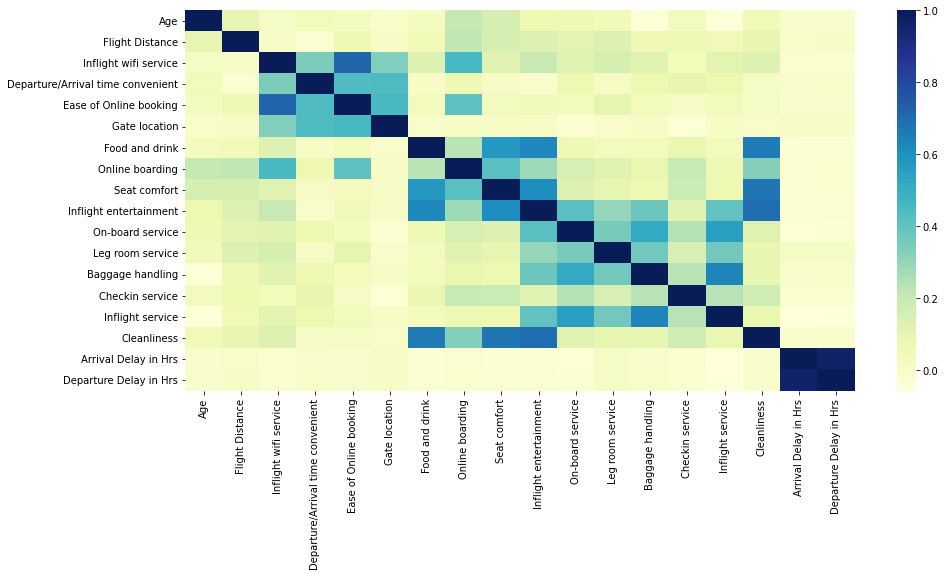

In [147]:
fig = plt.figure(figsize = [15, 7])
sns.heatmap(train.corr(), cmap='YlGnBu')

In [148]:
# sns.pairplot(train, hue ='satisfaction')

**Observations:**

- The missing values in **Arrival Delay in Minutes** column have been replaced with the median value since it is highly skewed data.

- Created new columns:  **Arrival Delay in Hrs** and **Departure Delay in Hrs** measured in Hours using the columns: **Arrival Delay in Minutes** and **Departure Delay in Minutes** measured in minutes respectively.
- Dropped existing columns (*Id, Arrival Delay in Minutes and Departure Delay in Minutes*) as they don't seem to contribute to the target column-**satisfaction**.

- There is high correlation between variables- 
 - **Cleanliness** with **(Food and drink, Seat comfort & Inflight entertainment)**
 - **Inflight service** with **(On-board service & Baggage handling)**
 - 

# *Post Profiling*

## Post Profiling Report

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports for each column from a pandas DataFrame.

- This will help analyse the impact of changes done during Data Preparation stage.


In [149]:
# profile = ProfileReport(df = train)
# profile.to_file(output_file = 'Post Profiling Report.html')
# print('Accomplished!')

**Observations:**

- There are **24 features** with **83123 unique observations** in the dataset.Total memory used is **14.6 MB**.

- There are **No Duplicate** rows in this dataset.

- There are **No Missing** values throughout the dataset.

    - The missing values in **Arrival Delay in Minutes** column have been replaced with the median value since it is highly skewed data.

    - Two columns: **Arrival Delay in Minutes** and **Departure Delay in Minutes** have been dropped after being converted into the columns: **Arrival Delay in Hrs** and **Departure Delay in Hrs** respectively since they both contain highly skewed data.

In [150]:
def chi_square(x,y):
  table = pd.crosstab(x,y)
  stat, p, dof, expected = chi2_contingency(table)
  if p < 0.05:
    print('Accept the Alternate Hypothesis (Dependent)', round(p,5))
  else:
    print('Failed to Reject the null hypothesis (Independent)', round(p,5))
  return table

In [151]:
chi_square(train['Age'], train['satisfaction'])

Accept the Alternate Hypothesis (Dependent) 0.0


satisfaction,neutral or dissatisfied,satisfied
Age,,
7,414,43
8,452,53
9,468,80
10,488,73
11,465,90
...,...,...
77,49,13
78,16,9
79,23,10


In [152]:
chi_square(train['Arrival Delay in Hrs'], train['satisfaction'])

Accept the Alternate Hypothesis (Dependent) 0.0


satisfaction,neutral or dissatisfied,satisfied
Arrival Delay in Hrs,,
0.00,24609,22195
0.02,939,826
0.03,879,761
0.05,786,766
0.07,781,769
...,...,...
15.40,1,0
15.87,1,0
16.85,0,1


In [153]:
chi_square(train['Baggage handling'], train['satisfaction'])

Accept the Alternate Hypothesis (Dependent) 0.0


satisfaction,neutral or dissatisfied,satisfied
Baggage handling,,
1,3970,1757
2,6502,2709
3,12607,3919
4,15468,14459
5,8457,13275


In [154]:
chi_square(train['Class'], train['satisfaction'])

Accept the Alternate Hypothesis (Dependent) 0.0


satisfaction,neutral or dissatisfied,satisfied
Class,,
Business,12093,27598
Eco,30431,7026
Eco Plus,4480,1495


In [155]:
chi_square(train['Customer Type'], train['satisfaction'])

Accept the Alternate Hypothesis (Dependent) 0.0


satisfaction,neutral or dissatisfied,satisfied
Customer Type,,
Loyal Customer,35435,32480
disloyal Customer,11569,3639


In [156]:
chi_square(train['Ease of Online booking'], train['satisfaction'])

Accept the Alternate Hypothesis (Dependent) 0.0


satisfaction,neutral or dissatisfied,satisfied
Ease of Online booking,,
0,1210,2394
1,8784,5313
2,13320,5818
3,13487,6023
4,7338,8316
5,2865,8255


In [157]:
chi_square(train['Gender'], train['satisfaction'])

Accept the Alternate Hypothesis (Dependent) 0.00069


satisfaction,neutral or dissatisfied,satisfied
Gender,,
Female,24059,18058
Male,22945,18061


In [158]:
chi_square(train['Departure/Arrival time convenient'], train['satisfaction'])

Accept the Alternate Hypothesis (Dependent) 0.0


satisfaction,neutral or dissatisfied,satisfied
Departure/Arrival time convenient,,
0,2203,2034
1,6365,6093
2,7581,6070
3,8038,6318
4,12480,7908
5,10337,7696


In [159]:
chi_square(train['Type of Travel'], train['satisfaction'])

Accept the Alternate Hypothesis (Dependent) 0.0


satisfaction,neutral or dissatisfied,satisfied
Type of Travel,,
Business travel,23839,33471
Personal Travel,23165,2648


In [160]:
chi_square(train['Departure Delay in Hrs'], train['satisfaction'])

Accept the Alternate Hypothesis (Dependent) 0.0


satisfaction,neutral or dissatisfied,satisfied
Departure Delay in Hrs,,
0.00,25425,21552
0.02,1280,1060
0.03,974,856
0.05,912,689
0.07,863,654
...,...,...
15.50,1,0
15.55,0,1
16.95,0,1


In [161]:
chi_square(train['Cleanliness'], train['satisfaction'])

Accept the Alternate Hypothesis (Dependent) 0.0


satisfaction,neutral or dissatisfied,satisfied
Cleanliness,,
0,9,0
1,8517,2089
2,10107,2821
3,11136,8389
4,10057,11668
5,7178,11152


In [162]:
chi_square(train['Food and drink'], train['satisfaction'])

Accept the Alternate Hypothesis (Dependent) 0.0


satisfaction,neutral or dissatisfied,satisfied
Food and drink,,
0,47,41
1,8165,2053
2,10753,6888
3,10719,7019
4,9230,10241
5,8090,9877


# *Exploratory Data Analysis (EDA)*

**Question 1: What is the frequency of Customer Satisfaction?**

In [163]:
train['satisfaction'].value_counts()/train['satisfaction'].shape[0] *100

neutral or dissatisfied    56.547526
satisfied                  43.452474
Name: satisfaction, dtype: float64

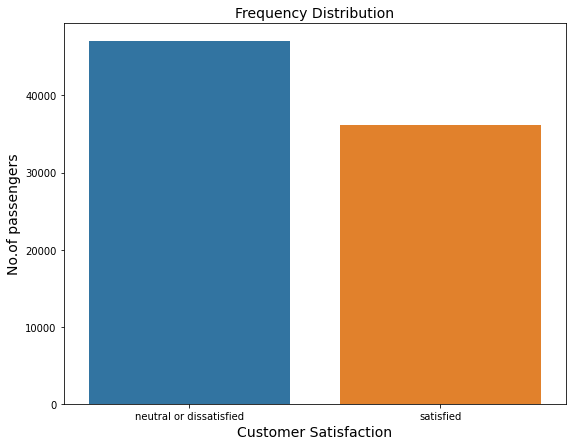

In [164]:
fig = plt.figure(figsize = [9, 7])
sns.countplot(x = 'satisfaction', data = train)
# plt.xticks(rotation=0, size=12)
plt.xlabel(xlabel = 'Customer Satisfaction', size = 14)
plt.ylabel(ylabel = 'No.of passengers', size = 14)
plt.title(label = 'Frequency Distribution', size = 14)
plt.show()

**Observation:**

- We can observe that there are lesser number of people (**43.4 %**) who are satisfied travelling by the airline.

**Question 2: What is the ratio of the gender category of passengers?**

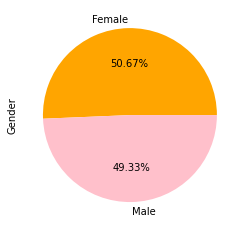

In [165]:
train['Gender'].value_counts().plot.pie( autopct = "%.2f%%", colors = ['orange', 'pink'])
plt.show()

**Observation:**

- We can observe that there are more **Female** (**50.67 %**) passengers than **Males** (**49.33%**).

**Question 3: What is the main reason for travel by most of the passengers ? What is their experience?**

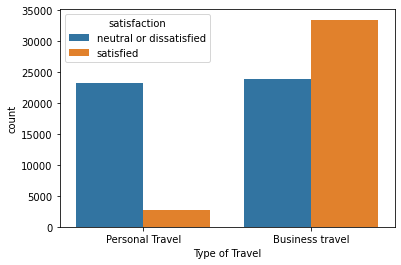

In [166]:
sns.countplot(x = 'Type of Travel', data = train, hue = 'satisfaction')
plt.show()

**Observation:**

> Following are the observations:-

- We can observe that most of the passengers travelling for **Personal** reasons gave a **neutral or dissatisfied** feedback.
- While most of the passengers travelling for **Business** purposes prefer to use this airline.

**Question 4: What is the ratio of Loyal to Disloyal passengers?**

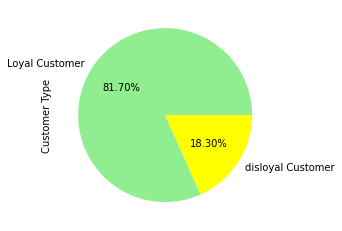

In [167]:
train['Customer Type'].value_counts().plot.pie( autopct = "%.2f%%", colors = ['lightgreen', 'yellow'])
plt.show()

**Observation:**

> We observe that we have more Loyal Customers (**81.7 %**) as compared to disloyal (**18.3 %**) ones.



**Question 5: Which is the most preferred class by the passengers travelling based on the reason for travel ?**

([0, 1], <a list of 2 Text major ticklabel objects>)

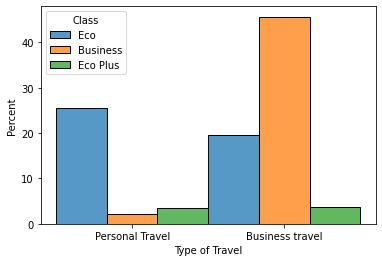

In [168]:
sns.histplot(binwidth=0.5, x="Type of Travel", hue="Class", data= train, stat="percent", multiple="dodge")

 
plt.xticks(rotation=0)

**Observation:**

> We observe that the most of the passengers travelling for Personal reasons (**~ 25 %**) prefer to travel by **Eco class**.
  
> **Business class** is mainly preferred while travelling for Business purposes.

**Question 6: How was the passenger's rating while booking online ?**

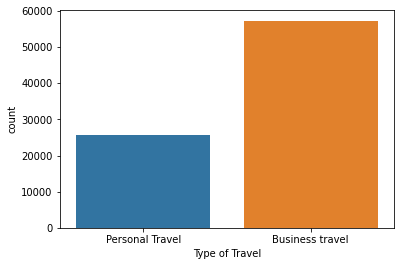

In [169]:
sns.countplot(x= "Type of Travel", data = train)

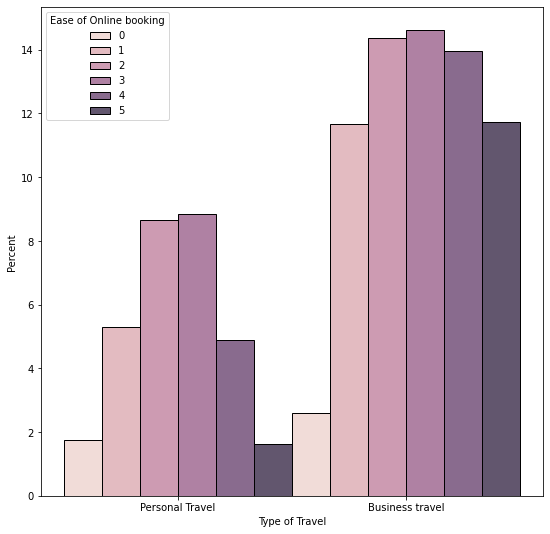

In [170]:
fig = plt.figure(figsize = [9, 9])
sns.histplot(binwidth=0.5, x= "Type of Travel" , hue= "Ease of Online booking", data= train, stat="percent", multiple="dodge")

**Observation:**

> There are more people travelling for Business purposes than for Personal reasons.

> We observe that the most of the passengers travelling for Personal reasons have given a rating between **2-3 out of 5**.
  
> Most of the passengers travelling for Business purposes have given ratings between **2-4 out of 5**.

**Question 7: How was passenger's experience of inflight airline services based on the variable 'Class'?**

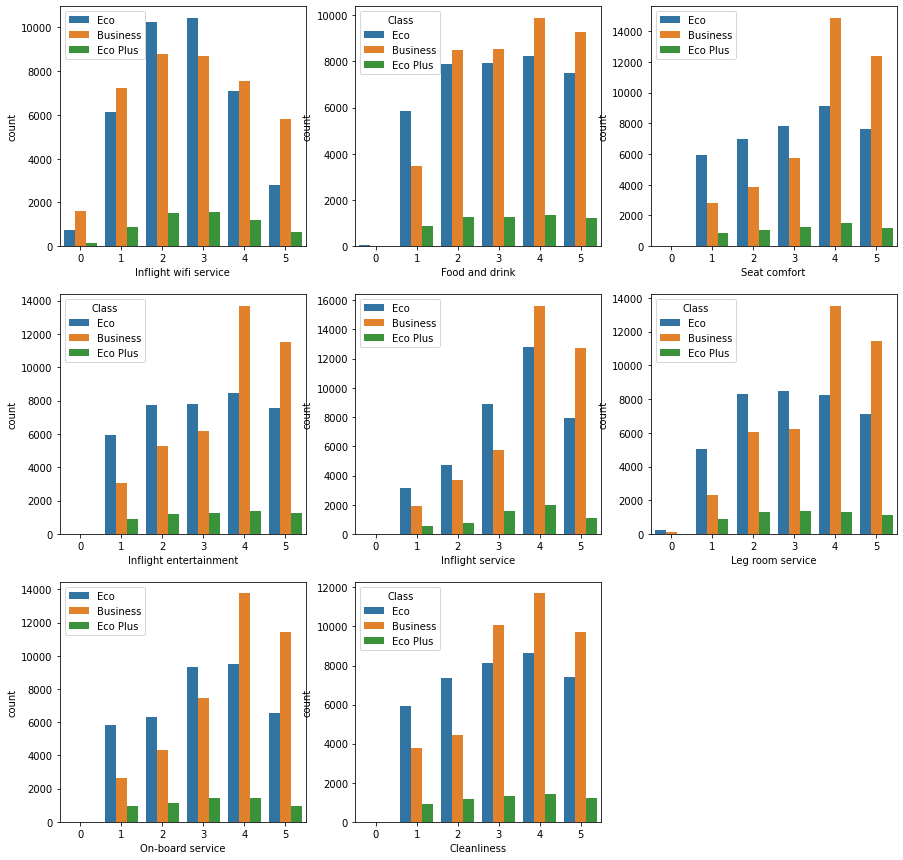

In [171]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15, 15])

###################################################
# First Plot for Inflight wifi service vs Class
###################################################
plt.subplot(3,3, 1)

sns.countplot(data=train,x='Inflight wifi service',hue= 'Class')
plt.legend(loc='upper left')
###################################################
# Second Plot for Food and drink vs Class
###################################################
plt.subplot(3,3, 2)

sns.countplot(data=train,x='Food and drink',hue='Class')

###################################################
# Third Plot for Seat comfort vs Class
###################################################
plt.subplot(3,3, 3)

sns.countplot(data=train,x='Seat comfort',hue='Class')
plt.legend(loc='upper left')

###################################################
# Fourth Plot for Inflight entertainment vs Class
###################################################
plt.subplot(3,3, 4)

sns.countplot(data=train,x= 'Inflight entertainment',hue='Class')

###################################################
# Fifth Plot for Inflight service vs Class
###################################################
plt.subplot(3,3, 5)

sns.countplot(data=train,x='Inflight service',hue='Class')
plt.legend(loc='upper left')

###################################################
# Sixth Plot for Leg room service vs Class
###################################################
plt.subplot(3,3, 6)

sns.countplot(data=train,x='Leg room service',hue='Class')

###################################################
# Seventh Plot for On-board service vs Class
###################################################
plt.subplot(3,3, 7)

sns.countplot(data=train,x='On-board service',hue='Class')
plt.legend(loc='upper left')

####################################################
# Eighth Plot for Cleanliness vs Class
###################################################
plt.subplot(3,3, 8)

sns.countplot(data=train,x='Cleanliness',hue='Class')

###################################################
# Display the output by rendering visual on the screen

plt.show()
##################################################


**Observation:**

> **Eco Class**: 
- *Inflight wifi service* ==> Maximum passengers gave ratings between **2-3**. 
- *Food and drink* ==> Maximum passengers gave ratings between **2-4**.
- *Seat comfort* ==> Maximum passengers gave ratings between **3-5**.
- *Inflight entertainment* ==> Maximum passengers gave ratings between **3-4**.
- *Inflight service* ==> Maximum passengers gave ratings between **3-4**.
- *Leg room service* ==> Maximum passengers gave ratings between **2-4**.
- *On-board service* ==> Maximum passengers gave ratings between **3-4**.
- *Cleanliness* ==> Maximum passengers gave ratings between **3-4**.


> **Eco Plus Class**: 
- *Inflight wifi service* ==> Maximum passengers gave ratings between **2-3**. 
- *Food and drink* ==> Maximum passengers gave ratings between **2-5**.
- *Seat comfort* ==> Maximum passengers gave ratings between **3-5**.
- *Inflight entertainment* ==> Maximum passengers gave ratings between **3-5**.
- *Inflight service* ==> Maximum passengers gave ratings between **3-4**.
- *Leg room service* ==> Maximum passengers gave ratings between **2-4**.
- *On-board service* ==> Maximum passengers gave ratings between **4-5**.
- *Cleanliness* ==> Maximum passengers gave ratings between **3-5**.
  

> **Business Class**: 
- *Inflight wifi service* ==> Maximum passengers gave ratings between **2-3**. 
- *Food and drink* ==> Maximum passengers gave ratings between **4-5**.
- *Seat comfort* ==> Maximum passengers gave ratings between **4-5**.
- *Inflight entertainment* ==> Maximum passengers gave ratings between **4-5**.
- *Inflight service* ==> Maximum passengers gave ratings between **4-5**.
- *Leg room service* ==> Maximum passengers gave ratings between **4-5**.
- *On-board service* ==> Maximum passengers gave ratings between **3-5**.
- *Cleanliness* ==> Maximum passengers gave ratings between **3-5**.


- We can see that the **Business class** passengers seem to be more satisfied as compared to those traveliing in **Eco or Eco Plus classes**. 
- The level of **Cleanliness** and **Inflight entertainment** is more in the **Eco Plus and Business Classes**.

**Question 8: How many passengers experience of airline's ground handling services ?**

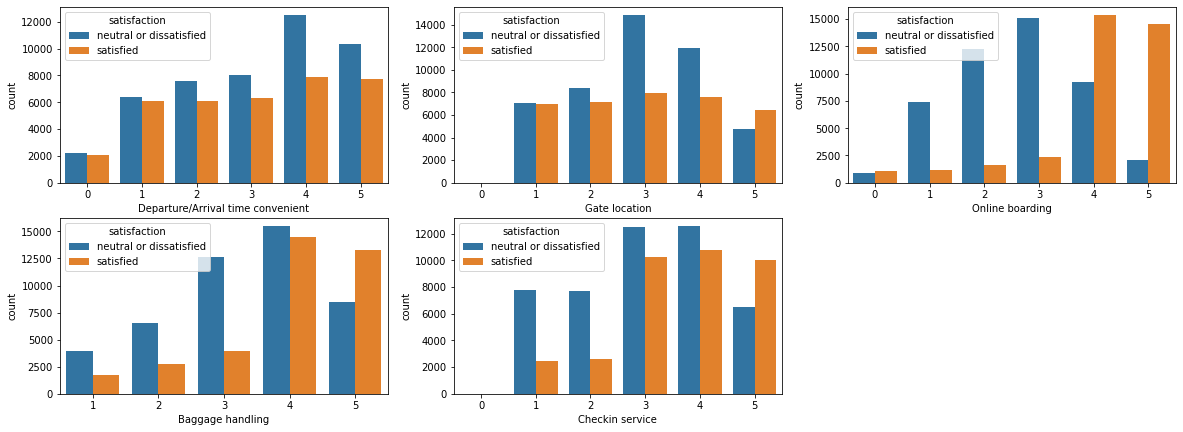

In [172]:
# Creating a custom figure size of 20 X 17 inches
figure = plt.figure(figsize=[20, 11])

###################################################
# First Plot for Departure/Arrival time convenient vs satisfaction
###################################################
plt.subplot(3,3, 1)

sns.countplot(data=train,x='Departure/Arrival time convenient',hue= 'satisfaction')


###################################################
# Second Plot for Gate location vs satisfaction
###################################################
plt.subplot(3,3, 2)

sns.countplot(data=train,x='Gate location',hue='satisfaction')

###################################################
# Third Plot for Online boarding vs satisfaction
###################################################
plt.subplot(3,3, 3)

sns.countplot(data=train,x='Online boarding',hue='satisfaction')

########################################################
# Fourth Plot for Baggage handling vs satisfaction
########################################################
plt.subplot(3,3, 4)

sns.countplot(data=train,x= 'Baggage handling',hue='satisfaction')

###################################################
# Fifth Plot for Checkin service vs satisfaction
###################################################
plt.subplot(3,3, 5)

sns.countplot(data=train,x='Checkin service',hue='satisfaction')

###################################################
# Display the output by rendering visual on the screen

plt.show()
##################################################


**Observation:**

> *Departure/Arrival time convenient* ==> Maximum passengers gave neutral or dissatisfied feedback.

> *Gate location* ==> Maximum passengers gave neutral or dissatisfied feedback.

> *Online boarding* ==> It seems that some passengers faced some difficulty(**rating: 2-3 only**) during online boarding but most of them (**rating: 4-5**) were able to use it efficiently.

> *Baggage handling* ==> Most of the passengers seem satisfied and have given high rating of **4-5**.

> *Checkin service* ==> Most of the passengers gave neutral or dissatisfied feedback with a rating  between **3-4**.



**Question 9: What was the effect of flight delays on the passenger's satisfaction ?**

In [173]:
print("Arrival Delay - Min value: ", train['Arrival Delay in Hrs'].min())
print("Arrival Delay - Max value: ", train['Arrival Delay in Hrs'].max())
print("Departure Delay - Min value: ", train['Departure Delay in Hrs'].min())
print("Departure Delay - Max value: ", train['Departure Delay in Hrs'].max())

Arrival Delay - Min value:  0.0
Arrival Delay - Max value:  26.4
Departure Delay - Min value:  0.0
Departure Delay - Max value:  26.53


In [174]:
t1 = train.copy()
bin = np.arange(0,30,2)
print(bin)

label = ['0-2 Hrs','2-4 Hrs','4-6 Hrs','6-8 Hrs','8-10 Hrs','10-12 Hrs','12-14 Hrs','14-16 Hrs','16-18 Hrs','18-20 Hrs','20-22 Hrs','22-24 Hrs','24-26 Hrs', '26-28 Hrs']

t1['Arrival Delay in Hrs'] = pd.cut(t1['Arrival Delay in Hrs'], bins = bin, labels = label, right=True)
t1['Departure Delay in Hrs'] = pd.cut(t1['Departure Delay in Hrs'], bins = bin, labels = label, right=True)


[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28]


In [175]:
t1['Arrival Delay in Hrs'].value_counts().sort_index()

0-2 Hrs      34256
2-4 Hrs       1677
4-6 Hrs        290
6-8 Hrs         64
8-10 Hrs        18
10-12 Hrs        5
12-14 Hrs        2
14-16 Hrs        4
16-18 Hrs        1
18-20 Hrs        0
20-22 Hrs        1
22-24 Hrs        0
24-26 Hrs        0
26-28 Hrs        1
Name: Arrival Delay in Hrs, dtype: int64

In [176]:
t1['Departure Delay in Hrs'].value_counts().sort_index()


0-2 Hrs      34147
2-4 Hrs       1635
4-6 Hrs        269
6-8 Hrs         66
8-10 Hrs        16
10-12 Hrs        2
12-14 Hrs        3
14-16 Hrs        5
16-18 Hrs        1
18-20 Hrs        0
20-22 Hrs        1
22-24 Hrs        0
24-26 Hrs        0
26-28 Hrs        1
Name: Departure Delay in Hrs, dtype: int64

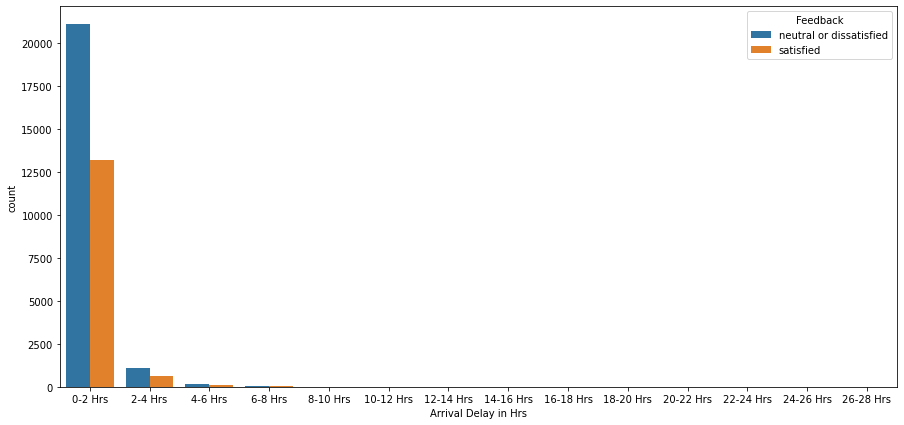

In [177]:
figure = plt.figure(figsize=[15,7])
sns.countplot(data=t1,x='Arrival Delay in Hrs',hue='satisfaction')
plt.legend(title='Feedback', loc='upper right')

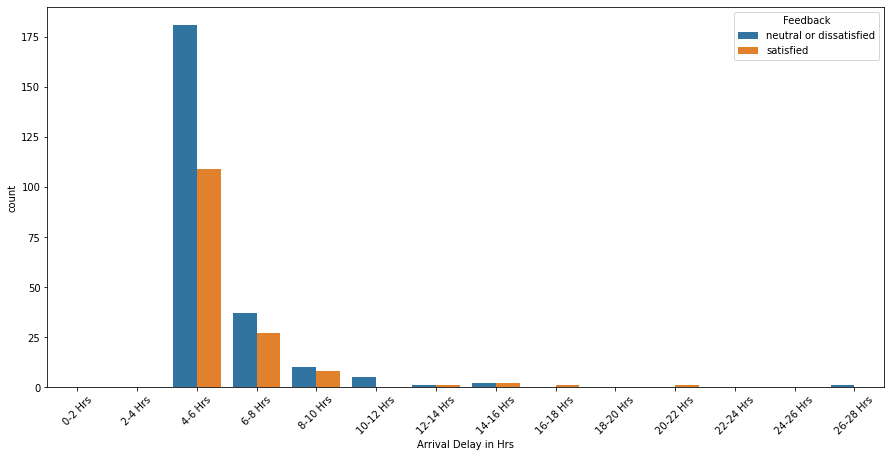

In [178]:
figure = plt.figure(figsize=[15,7])
list1 = ['0-2 Hrs', '2-4 Hrs']
sns.countplot(data=t1[~t1['Arrival Delay in Hrs'].isin(list1)],x='Arrival Delay in Hrs',hue='satisfaction')
plt.xticks(rotation = 45)
plt.legend(title='Feedback', loc='upper right')
plt.show()
# plt.xlim(0, 35000)

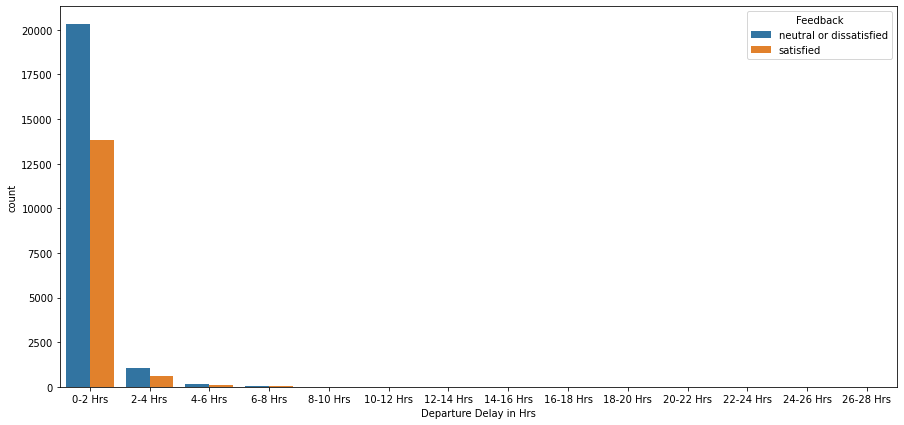

In [179]:
figure = plt.figure(figsize=[15,7])
sns.countplot(data=t1,x='Departure Delay in Hrs',hue='satisfaction')
plt.legend(title='Feedback', loc='upper right')
# plt.xlim([])

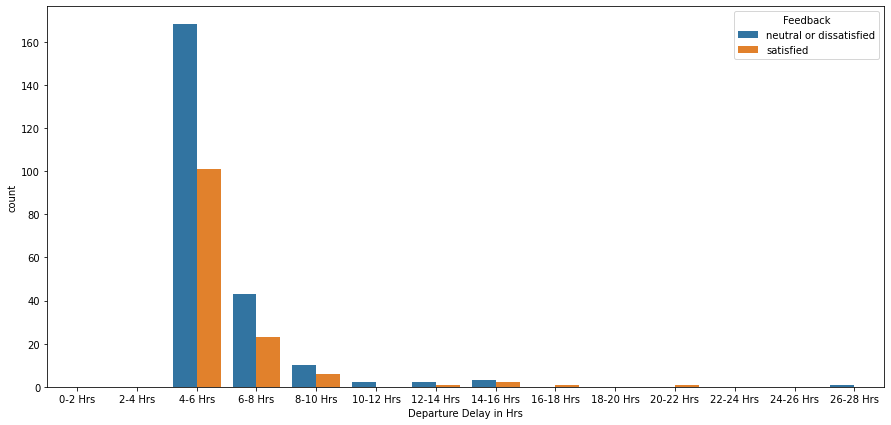

In [180]:
figure = plt.figure(figsize=[15,7])
list1 = ['0-2 Hrs', '2-4 Hrs']
sns.countplot(data=t1[~t1['Departure Delay in Hrs'].isin(list1)],x='Departure Delay in Hrs',hue='satisfaction')
plt.legend(title='Feedback', loc='upper right')

In [181]:
t1[t1['Departure Delay in Hrs'] == '26-28 Hrs']

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Arrival Delay in Hrs,Departure Delay in Hrs
52311,Female,Loyal Customer,47,Personal Travel,Eco,1120,2,2,2,3,...,2,4,4,4,2,3,2,neutral or dissatisfied,26-28 Hrs,26-28 Hrs


In [182]:
t1[t1['Arrival Delay in Hrs'] == '26-28 Hrs']

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Arrival Delay in Hrs,Departure Delay in Hrs
52311,Female,Loyal Customer,47,Personal Travel,Eco,1120,2,2,2,3,...,2,4,4,4,2,3,2,neutral or dissatisfied,26-28 Hrs,26-28 Hrs


**Observation:**

> We observe that **satisfaction** level decreases with the increase in the flight delay during both **Arrival** and **Departure** time.

> It is also found that there are very few cases where the flights have been  delayed for more than **6-8 hours**.

> There was only one such worst case where the flight got resheduled to the next day. Due to which the **Female** passenger who was also a Loyal customer has given bad ratings for this airline.




**Question 10: What was the relationship between Flight Distance and Type of Travel ?**

In [183]:
t2 = train.copy()

bin = np.arange(30, 5200, 150)
print(bin)
t2['Flight Distance'] = pd.cut(t2['Flight Distance'], bins = bin, include_lowest = True)

[  30  180  330  480  630  780  930 1080 1230 1380 1530 1680 1830 1980
 2130 2280 2430 2580 2730 2880 3030 3180 3330 3480 3630 3780 3930 4080
 4230 4380 4530 4680 4830 4980 5130]


In [184]:
t2['Flight Distance'].value_counts(dropna = False).sort_index()

(29.999, 180.0]      4263
(180.0, 330.0]      10338
(330.0, 480.0]      10269
(480.0, 630.0]       8363
(630.0, 780.0]       6246
(780.0, 930.0]       5647
(930.0, 1080.0]      5755
(1080.0, 1230.0]     3283
(1230.0, 1380.0]     1784
(1380.0, 1530.0]     2590
(1530.0, 1680.0]     2839
(1680.0, 1830.0]     2361
(1830.0, 1980.0]     1950
(1980.0, 2130.0]     1545
(2130.0, 2280.0]     1784
(2280.0, 2430.0]     1854
(2430.0, 2580.0]     2105
(2580.0, 2730.0]     1665
(2730.0, 2880.0]     1014
(2880.0, 3030.0]      974
(3030.0, 3180.0]     1008
(3180.0, 3330.0]      939
(3330.0, 3480.0]      987
(3480.0, 3630.0]      995
(3630.0, 3780.0]     1017
(3780.0, 3930.0]     1046
(3930.0, 4080.0]      455
(4080.0, 4230.0]        0
(4230.0, 4380.0]       15
(4380.0, 4530.0]        8
(4530.0, 4680.0]        0
(4680.0, 4830.0]        4
(4830.0, 4980.0]       11
(4980.0, 5130.0]        9
Name: Flight Distance, dtype: int64

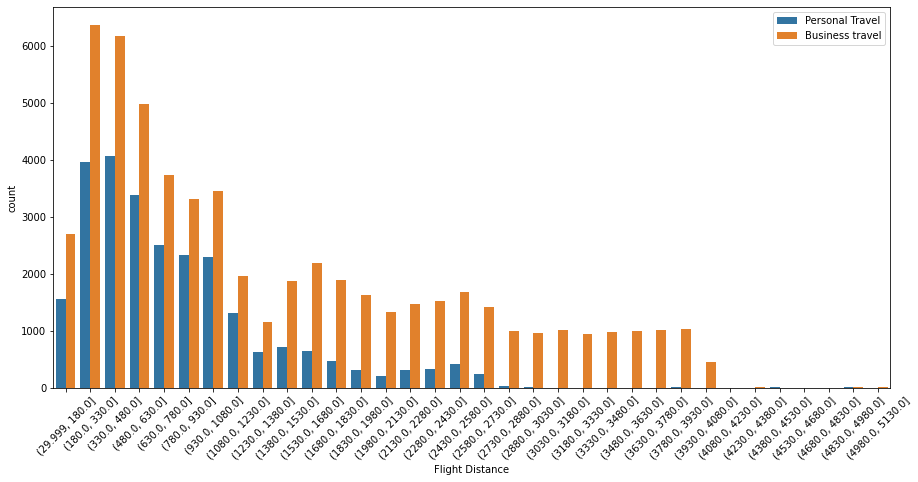

In [185]:
figure = plt.figure(figsize=[15,7])
sns.countplot(data=t2,x= 'Flight Distance',hue='Type of Travel')
plt.xticks(rotation = 45)
plt.legend(loc='upper right')
plt.show()

**Observation:**

> We observe that passengers travelling for **Personal reasons,** mostly travel between **31 km to 930 km**.

> Only those travelling for **Business purposes**, travel for very long distances for eg. **4983 km (Max value for variable- 'Flight Distance' ).**



# Data Transformation
  *Transformation of both Train and Test data.*


In [186]:
from sklearn.preprocessing import StandardScaler

num_cols = test.select_dtypes(exclude = object)
# define standard scaler
scaler = StandardScaler()
# transform data
test[num_cols.columns] = scaler.fit_transform(num_cols)

num_cols1 = train.select_dtypes(exclude = object)
# define standard scaler
# scaler = StandardScaler()
# transform data
train[num_cols1.columns] = scaler.fit_transform(num_cols1)
# print(scaled)
# test_df.skew()

In [187]:
test.corr()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Hrs,Departure Delay in Hrs
Age,1.000000,0.096859,0.025464,0.038863,0.025931,-0.001028,0.031748,0.209112,0.163419,0.081442,0.054551,0.033000,-0.045930,0.049005,-0.054658,0.060014,-0.012924,-0.007982
Flight Distance,0.096859,1.000000,0.002865,-0.013591,0.065540,0.007160,0.055237,0.208922,0.152125,0.125930,0.106810,0.140368,0.065322,0.080569,0.063892,0.087993,-0.005939,-0.001634
Inflight wifi service,0.025464,0.002865,1.000000,0.335815,0.711992,0.330913,0.141366,0.459127,0.132751,0.223864,0.125038,0.169020,0.126053,0.054676,0.116494,0.142807,-0.015107,-0.015648
Departure/Arrival time convenient,0.038863,-0.013591,0.335815,1.000000,0.432040,0.441730,0.004273,0.072401,0.012504,-0.004316,0.076101,0.017891,0.065968,0.092213,0.068271,0.010942,0.012299,0.012972
Ease of Online booking,0.025931,0.065540,0.711992,0.432040,1.000000,0.462349,0.027078,0.397080,0.029291,0.052386,0.043246,0.117278,0.037795,0.018261,0.035347,0.015628,-0.000953,-0.000153
Gate location,-0.001028,0.007160,0.330913,0.441730,0.462349,1.000000,-0.002411,0.005800,0.008990,0.010323,-0.018702,0.003345,0.007781,-0.029280,0.005372,-0.008223,0.007110,0.004866
Food and drink,0.031748,0.055237,0.141366,0.004273,0.027078,-0.002411,1.000000,0.238075,0.573049,0.615968,0.057103,0.031327,0.033069,0.097807,0.036219,0.657993,-0.031918,-0.031362
Online boarding,0.209112,0.208922,0.459127,0.072401,0.397080,0.005800,0.238075,1.000000,0.428145,0.288326,0.150135,0.129481,0.082046,0.215807,0.075857,0.345409,-0.014124,-0.012986
Seat comfort,0.163419,0.152125,0.132751,0.012504,0.029291,0.008990,0.573049,0.428145,1.000000,0.612165,0.135946,0.110634,0.074059,0.198300,0.072242,0.684670,-0.029729,-0.030642
Inflight entertainment,0.081442,0.125930,0.223864,-0.004316,0.052386,0.010323,0.615968,0.288326,0.612165,1.000000,0.425516,0.304994,0.382341,0.132444,0.410964,0.682892,-0.029371,-0.026679


In [188]:
train.corr()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Hrs,Departure Delay in Hrs
Age,1.000000,0.100124,0.015985,0.037954,0.024568,-0.001396,0.020834,0.208919,0.159514,0.075221,0.058371,0.042507,-0.047916,0.032107,-0.048074,0.052049,-0.011905,-0.010723
Flight Distance,0.100124,1.000000,0.008168,-0.021642,0.065762,0.004204,0.057414,0.216329,0.158617,0.129424,0.110198,0.132303,0.062639,0.071191,0.055933,0.094402,-0.001576,0.003119
Inflight wifi service,0.015985,0.008168,1.000000,0.345815,0.716820,0.337559,0.133053,0.456428,0.120125,0.205673,0.120613,0.158338,0.119624,0.040306,0.108901,0.130169,-0.020017,-0.017829
Departure/Arrival time convenient,0.037954,-0.021642,0.345815,1.000000,0.438179,0.445502,0.005048,0.069544,0.011039,-0.005021,0.067079,0.011074,0.073657,0.093595,0.074568,0.015097,-0.004287,-0.001987
Ease of Online booking,0.024568,0.065762,0.716820,0.438179,1.000000,0.457747,0.033064,0.405808,0.030200,0.045708,0.037738,0.105184,0.039010,0.009301,0.035261,0.016322,-0.009744,-0.007955
Gate location,-0.001396,0.004204,0.337559,0.445502,0.457747,1.000000,-0.000859,0.000663,0.002331,0.001801,-0.030787,-0.008186,0.000933,-0.036975,0.000741,-0.002761,0.004690,0.005622
Food and drink,0.020834,0.057414,0.133053,0.005048,0.033064,-0.000859,1.000000,0.233558,0.574923,0.624139,0.059554,0.032789,0.035144,0.084642,0.033400,0.657690,-0.032580,-0.029532
Online boarding,0.208919,0.216329,0.456428,0.069544,0.405808,0.000663,0.233558,1.000000,0.418222,0.284233,0.156759,0.122564,0.083574,0.201613,0.074228,0.328060,-0.023831,-0.020490
Seat comfort,0.159514,0.158617,0.120125,0.011039,0.030200,0.002331,0.574923,0.418222,1.000000,0.610177,0.130962,0.104274,0.074639,0.190202,0.068417,0.676994,-0.029703,-0.027152
Inflight entertainment,0.075221,0.129424,0.205673,-0.005021,0.045708,0.001801,0.624139,0.284233,0.610177,1.000000,0.418800,0.298355,0.377144,0.117905,0.403277,0.694027,-0.030872,-0.027633


In [189]:
train['satisfaction'].value_counts()

neutral or dissatisfied    47004
satisfied                  36119
Name: satisfaction, dtype: int64

In [190]:
test.select_dtypes(include = object).columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')

In [191]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

Cat_cols = test.select_dtypes(include = object).columns
print(test[Cat_cols])

for i in Cat_cols:
  test[i] = le.fit_transform(test[i])


Cat_cols1 = train.select_dtypes(include = object).columns
print(train[Cat_cols1])

for i in Cat_cols1:
  train[i] = le.fit_transform(train[i])


       Gender      Customer Type   Type of Travel     Class
0        Male     Loyal Customer  Business travel       Eco
1      Female     Loyal Customer  Business travel  Business
2      Female     Loyal Customer  Personal Travel  Eco Plus
3        Male  disloyal Customer  Business travel       Eco
4        Male     Loyal Customer  Personal Travel  Business
...       ...                ...              ...       ...
20776    Male  disloyal Customer  Business travel       Eco
20777    Male  disloyal Customer  Business travel  Business
20778  Female     Loyal Customer  Business travel  Business
20779    Male     Loyal Customer  Business travel       Eco
20780  Female     Loyal Customer  Business travel  Business

[20781 rows x 4 columns]
       Gender      Customer Type   Type of Travel     Class  \
0      Female     Loyal Customer  Personal Travel       Eco   
1      Female     Loyal Customer  Business travel       Eco   
2        Male  disloyal Customer  Business travel       Eco   
3 

In [192]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,83123.0,4.933171e-01,0.499958,0.000000,0.000000,0.000000,1.000000,1.000000
Customer Type,83123.0,1.829578e-01,0.386634,0.000000,0.000000,0.000000,0.000000,1.000000
Age,83123.0,-1.463860e-17,1.000006,-2.142543,-0.817987,0.042975,0.771481,3.023226
Type of Travel,83123.0,3.105398e-01,0.462717,0.000000,0.000000,0.000000,1.000000,1.000000
Class,83123.0,5.943842e-01,0.620370,0.000000,0.000000,1.000000,1.000000,2.000000
Flight Distance,83123.0,9.531118e-18,1.000006,-1.161273,-0.778751,-0.347161,0.554070,3.797501
Inflight wifi service,83123.0,1.307857e-16,1.000006,-2.054641,-0.550816,0.201097,0.953009,1.704922
Departure/Arrival time convenient,83123.0,-2.581523e-17,1.000006,-2.005450,-0.695669,-0.040779,0.614111,1.269001
Ease of Online booking,83123.0,-1.468562e-16,1.000006,-1.967388,-0.539875,0.173882,0.887638,1.601395
Gate location,83123.0,-1.758342e-16,1.000006,-2.328323,-0.764671,0.017156,0.798982,1.580809


In [193]:
train['satisfaction'].value_counts()

0    47004
1    36119
Name: satisfaction, dtype: int64

In [194]:
test.select_dtypes(exclude = object).columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Arrival Delay in Hrs', 'Departure Delay in Hrs'],
      dtype='object')

In [195]:
train['satisfaction'].value_counts()

0    47004
1    36119
Name: satisfaction, dtype: int64

In [196]:
test['Gender'].value_counts()

0    10610
1    10171
Name: Gender, dtype: int64

In [197]:
train['Gender'].value_counts(dropna = False)

0    42117
1    41006
Name: Gender, dtype: int64

# *Model Evaluation*

## **Splitting the data into train and test dataset.**

In [198]:
X = train.drop(['satisfaction'], axis = 1)
Y = train['satisfaction']

In [199]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 123)

In [200]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(66498, 22)
(16625, 22)
(66498,)
(16625,)


## **Creating function for model evaluation**

In [201]:
def model_eval(actual, predicted):
  acc_score = accuracy_score(actual, predicted)
  cm_matrix = confusion_matrix(actual, predicted)
  clas_rep = classification_report(actual, predicted)
  print('Accuracy of the model is : ', round(acc_score,2))
  print(cm_matrix)
  print(clas_rep)

# *Model Evaluation before PCA implementation*

## **Application of Random Forest Classification**

In [202]:
rf = RandomForestClassifier(n_estimators = 800,verbose = 1, random_state = 123)
rf.fit(x_train, y_train)
preds_train = rf.predict(x_train)
preds_test = rf.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:   11.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:    3.0s finished


In [203]:
model_eval(y_train, preds_train)

Accuracy of the model is :  1.0
[[37622     0]
 [    0 28876]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37622
           1       1.00      1.00      1.00     28876

    accuracy                           1.00     66498
   macro avg       1.00      1.00      1.00     66498
weighted avg       1.00      1.00      1.00     66498



In [204]:
model_eval(y_test, preds_test)

Accuracy of the model is :  0.96
[[9174  208]
 [ 446 6797]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      9382
           1       0.97      0.94      0.95      7243

    accuracy                           0.96     16625
   macro avg       0.96      0.96      0.96     16625
weighted avg       0.96      0.96      0.96     16625



## **Decision Tree Classifier Implementation**

In [205]:
dtree = DecisionTreeClassifier(max_depth = 3,min_samples_split = 3, random_state =123)
dtree.fit(x_train, y_train)
pred_dtr_train = dtree.predict(x_train)
pred_dtr_test = dtree.predict(x_test)

In [206]:
model_eval(y_train,pred_dtr_train)

Accuracy of the model is :  0.88
[[32621  5001]
 [ 2673 26203]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89     37622
           1       0.84      0.91      0.87     28876

    accuracy                           0.88     66498
   macro avg       0.88      0.89      0.88     66498
weighted avg       0.89      0.88      0.88     66498



In [207]:
model_eval(y_test,pred_dtr_test)

Accuracy of the model is :  0.89
[[8174 1208]
 [ 683 6560]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.90      9382
           1       0.84      0.91      0.87      7243

    accuracy                           0.89     16625
   macro avg       0.88      0.89      0.89     16625
weighted avg       0.89      0.89      0.89     16625



## **Logistic Regression Implementation**

In [208]:
logreg = LogisticRegression(max_iter = 800)
logreg.fit(x_train,y_train)
predlog_ytrain = logreg.predict(x_train)
predlog_ytest =  logreg.predict(x_test)

In [209]:
model_eval(y_train, predlog_ytrain)

Accuracy of the model is :  0.87
[[34085  3537]
 [ 4790 24086]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     37622
           1       0.87      0.83      0.85     28876

    accuracy                           0.87     66498
   macro avg       0.87      0.87      0.87     66498
weighted avg       0.87      0.87      0.87     66498



In [210]:
model_eval(y_test, predlog_ytest)

Accuracy of the model is :  0.88
[[8484  898]
 [1149 6094]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      9382
           1       0.87      0.84      0.86      7243

    accuracy                           0.88     16625
   macro avg       0.88      0.87      0.87     16625
weighted avg       0.88      0.88      0.88     16625



## **Naive Bayes Theorem**

In [211]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [212]:
pred_train_nb = nb. predict(x_train)
pred_test_nb = nb. predict(x_test)

In [213]:
model_eval(y_train, pred_train_nb)

Accuracy of the model is :  0.86
[[33831  3791]
 [ 5293 23583]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     37622
           1       0.86      0.82      0.84     28876

    accuracy                           0.86     66498
   macro avg       0.86      0.86      0.86     66498
weighted avg       0.86      0.86      0.86     66498



In [214]:
model_eval(y_test, pred_test_nb)

Accuracy of the model is :  0.87
[[8480  902]
 [1284 5959]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      9382
           1       0.87      0.82      0.85      7243

    accuracy                           0.87     16625
   macro avg       0.87      0.86      0.87     16625
weighted avg       0.87      0.87      0.87     16625



## **XGBoost Classifier**

In [215]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state =123)

In [216]:
xgb.fit(x_train,y_train)
XGB_ytrain = xgb.predict(x_train)
XGB_ytest =  xgb.predict(x_test)

In [217]:
model_eval(y_train,XGB_ytrain )

Accuracy of the model is :  0.94
[[36041  1581]
 [ 2313 26563]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     37622
           1       0.94      0.92      0.93     28876

    accuracy                           0.94     66498
   macro avg       0.94      0.94      0.94     66498
weighted avg       0.94      0.94      0.94     66498



In [218]:
model_eval(y_test,XGB_ytest )

Accuracy of the model is :  0.94
[[8995  387]
 [ 590 6653]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      9382
           1       0.95      0.92      0.93      7243

    accuracy                           0.94     16625
   macro avg       0.94      0.94      0.94     16625
weighted avg       0.94      0.94      0.94     16625



## **CatBoostClassifier**

In [219]:
!pip3 install catboost
from catboost import Pool, CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [220]:
 cat = CatBoostClassifier(iterations = 2, learning_rate = 0.1)

 cat.fit(x_train,y_train)
 Cat_ytrain = cat.predict(x_train)
 Cat_ytest =  cat.predict(x_test) 

0:	learn: 0.5635168	total: 20.5ms	remaining: 20.5ms
1:	learn: 0.4724879	total: 41.1ms	remaining: 0us


In [221]:
print('CatBoost model is fitted: ' + str(cat.is_fitted()))
print('CatBoost model parameters:')
print(cat.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 2, 'learning_rate': 0.1}


In [222]:
model_eval(y_train,Cat_ytrain )

Accuracy of the model is :  0.91
[[34556  3066]
 [ 3081 25795]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     37622
           1       0.89      0.89      0.89     28876

    accuracy                           0.91     66498
   macro avg       0.91      0.91      0.91     66498
weighted avg       0.91      0.91      0.91     66498



In [223]:
model_eval(y_test,Cat_ytest )

Accuracy of the model is :  0.91
[[8668  714]
 [ 759 6484]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      9382
           1       0.90      0.90      0.90      7243

    accuracy                           0.91     16625
   macro avg       0.91      0.91      0.91     16625
weighted avg       0.91      0.91      0.91     16625



## **LGBM Classifier**

In [261]:
import lightgbm as lgb

lb = lgb.LGBMClassifier()
lb.fit(x_train, y_train)

LGBMClassifier()

In [262]:
LG_ytrain = lb.predict(x_train)
LG_ytest =  lb.predict(x_test) 

In [263]:
model_eval(y_train,LG_ytrain )

Accuracy of the model is :  0.97
[[37012   610]
 [ 1577 27299]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     37622
           1       0.98      0.95      0.96     28876

    accuracy                           0.97     66498
   macro avg       0.97      0.96      0.97     66498
weighted avg       0.97      0.97      0.97     66498



In [264]:
model_eval(y_test,LG_ytest )

Accuracy of the model is :  0.96
[[9209  173]
 [ 419 6824]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9382
           1       0.98      0.94      0.96      7243

    accuracy                           0.96     16625
   macro avg       0.97      0.96      0.96     16625
weighted avg       0.96      0.96      0.96     16625



# *Model Evaluation after PCA implementation*

## **Principal Component Analysis (PCA) Implementation**

In [224]:
from sklearn.decomposition import PCA

pc = PCA(n_components= len(X.columns))
pc.fit(x_train)

PCA(n_components=22)

In [225]:
pc.explained_variance_ratio_

array([0.20539663, 0.12511126, 0.11521324, 0.10110858, 0.07045053,
       0.05230664, 0.04963481, 0.04834802, 0.0367793 , 0.03001261,
       0.02530843, 0.02370856, 0.0193798 , 0.01761598, 0.01559226,
       0.01533161, 0.0130397 , 0.01225038, 0.00983989, 0.00771068,
       0.00374494, 0.00211616])

In [226]:
var = np.cumsum(np.round(pc.explained_variance_ratio_, 2))
var

array([0.21, 0.34, 0.46, 0.56, 0.63, 0.68, 0.73, 0.78, 0.82, 0.85, 0.88,
       0.9 , 0.92, 0.94, 0.96, 0.98, 0.99, 1.  , 1.01, 1.02, 1.02, 1.02])

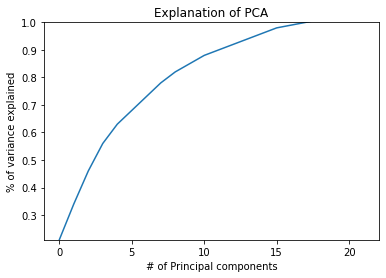

In [227]:
plt.ylabel('% of variance explained')
plt.xlabel('# of Principal components')
plt.title('Explanation of PCA')
plt.ylim(min(var),1)
plt.style.context('seaborn-whitegrid')
plt.plot(var)
plt.show()

In [228]:
x_train_pca = pc.fit_transform(x_train)
x_test_pca = pc.fit_transform(x_test)

## **Random Forest with Transformed Variables**

In [229]:
rf_pca = RandomForestClassifier(n_estimators= 200,random_state = 123)
rf_pca.fit(x_train_pca, y_train)
preds_train_pca = rf_pca.predict(x_train_pca)
preds_test_pca = rf_pca.predict(x_test_pca)

In [230]:
model_eval(y_train, preds_train_pca)

Accuracy of the model is :  1.0
[[37622     0]
 [    0 28876]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37622
           1       1.00      1.00      1.00     28876

    accuracy                           1.00     66498
   macro avg       1.00      1.00      1.00     66498
weighted avg       1.00      1.00      1.00     66498



In [231]:
model_eval(y_test, preds_test_pca)

Accuracy of the model is :  0.9
[[8883  499]
 [1136 6107]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      9382
           1       0.92      0.84      0.88      7243

    accuracy                           0.90     16625
   macro avg       0.91      0.89      0.90     16625
weighted avg       0.90      0.90      0.90     16625



## **Decision Tree Classifier with Transformed Variables**

In [232]:
dtree1 = DecisionTreeClassifier(max_depth = 3,min_samples_split = 3, random_state =123)
dtree1.fit(x_train_pca, y_train)
pred1_dtr_train = dtree1.predict(x_train_pca)
pred1_dtr_test = dtree1.predict(x_test_pca)

In [233]:
model_eval(y_train, pred1_dtr_train)

Accuracy of the model is :  0.84
[[36269  1353]
 [ 9088 19788]]
              precision    recall  f1-score   support

           0       0.80      0.96      0.87     37622
           1       0.94      0.69      0.79     28876

    accuracy                           0.84     66498
   macro avg       0.87      0.82      0.83     66498
weighted avg       0.86      0.84      0.84     66498



In [234]:
model_eval(y_test, pred1_dtr_test)

Accuracy of the model is :  0.85
[[9076  306]
 [2234 5009]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      9382
           1       0.94      0.69      0.80      7243

    accuracy                           0.85     16625
   macro avg       0.87      0.83      0.84     16625
weighted avg       0.86      0.85      0.84     16625



## **Logistic Regression with Transformed Variables**

In [235]:
logreg = LogisticRegression(max_iter = 800)
logreg.fit(x_train_pca,y_train)
predlog1_ytrain = logreg.predict(x_train_pca)
predlog1_ytest =  logreg.predict(x_test_pca)

In [236]:
model_eval(y_train, predlog1_ytrain)

Accuracy of the model is :  0.87
[[34085  3537]
 [ 4791 24085]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     37622
           1       0.87      0.83      0.85     28876

    accuracy                           0.87     66498
   macro avg       0.87      0.87      0.87     66498
weighted avg       0.87      0.87      0.87     66498



In [237]:
model_eval(y_test, predlog1_ytest)

Accuracy of the model is :  0.85
[[8067 1315]
 [1209 6034]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      9382
           1       0.82      0.83      0.83      7243

    accuracy                           0.85     16625
   macro avg       0.85      0.85      0.85     16625
weighted avg       0.85      0.85      0.85     16625



## **Naive Bayes with Transformed Variables**

In [238]:
nb_new = GaussianNB()
nb_new.fit(x_train_pca, y_train)

GaussianNB()

In [239]:
pred1_train_nb = nb_new.predict(x_train_pca)
pred1_test_nb = nb_new.predict(x_test_pca)

In [240]:
model_eval(y_train, pred1_train_nb)

Accuracy of the model is :  0.83
[[32753  4869]
 [ 6593 22283]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85     37622
           1       0.82      0.77      0.80     28876

    accuracy                           0.83     66498
   macro avg       0.83      0.82      0.82     66498
weighted avg       0.83      0.83      0.83     66498



In [241]:
model_eval(y_test, pred1_test_nb)

Accuracy of the model is :  0.83
[[8064 1318]
 [1590 5653]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      9382
           1       0.81      0.78      0.80      7243

    accuracy                           0.83     16625
   macro avg       0.82      0.82      0.82     16625
weighted avg       0.82      0.83      0.82     16625



## **XGBoost Classifier with Transformed Variables**

In [273]:
from xgboost import XGBClassifier

xgb1 = XGBClassifier(random_state =123)

In [274]:
xgb1.fit(x_train_pca,y_train)
XGB1_ytrain = xgb1.predict(x_train_pca)
XGB1_ytest =  xgb1.predict(x_test_pca)

In [275]:
model_eval(y_train,XGB1_ytrain )

Accuracy of the model is :  0.91
[[35810  1812]
 [ 4181 24695]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     37622
           1       0.93      0.86      0.89     28876

    accuracy                           0.91     66498
   macro avg       0.91      0.90      0.91     66498
weighted avg       0.91      0.91      0.91     66498



In [276]:
model_eval(y_test,XGB1_ytest )

Accuracy of the model is :  0.9
[[8859  523]
 [1158 6085]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      9382
           1       0.92      0.84      0.88      7243

    accuracy                           0.90     16625
   macro avg       0.90      0.89      0.90     16625
weighted avg       0.90      0.90      0.90     16625



## **CatBoost Classifier with Transformed Variables**

In [277]:
 cat1 = CatBoostClassifier(iterations = 2, learning_rate = 0.1)

 cat1.fit(x_train_pca,y_train)
 Cat1_ytrain = cat1.predict(x_train_pca)
 Cat1_ytest =  cat1.predict(x_test_pca) 

0:	learn: 0.6158471	total: 27.7ms	remaining: 27.7ms
1:	learn: 0.5513333	total: 53.4ms	remaining: 0us


In [278]:
print('CatBoost model is fitted: ' + str(cat1.is_fitted()))
print('CatBoost model parameters:')
print(cat1.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 2, 'learning_rate': 0.1}


In [279]:
model_eval(y_train,Cat1_ytrain )

Accuracy of the model is :  0.86
[[34760  2862]
 [ 6433 22443]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     37622
           1       0.89      0.78      0.83     28876

    accuracy                           0.86     66498
   macro avg       0.87      0.85      0.86     66498
weighted avg       0.86      0.86      0.86     66498



In [280]:
model_eval(y_test,Cat1_ytest )

Accuracy of the model is :  0.86
[[8669  713]
 [1578 5665]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      9382
           1       0.89      0.78      0.83      7243

    accuracy                           0.86     16625
   macro avg       0.87      0.85      0.86     16625
weighted avg       0.86      0.86      0.86     16625



## **LGBM Classifier with Transformed Variables**

In [265]:
lb1 = lgb.LGBMClassifier()
lb1.fit(x_train_pca, y_train)

LGBMClassifier()

In [266]:
LG1_ytrain = lb1.predict(x_train_pca)
LG1_ytest =  lb1.predict(x_test_pca) 

In [267]:
model_eval(y_train,LG1_ytrain )

Accuracy of the model is :  0.95
[[36479  1143]
 [ 2219 26657]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     37622
           1       0.96      0.92      0.94     28876

    accuracy                           0.95     66498
   macro avg       0.95      0.95      0.95     66498
weighted avg       0.95      0.95      0.95     66498



In [268]:
model_eval(y_test,LG1_ytest )

Accuracy of the model is :  0.9
[[8677  705]
 [ 906 6337]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      9382
           1       0.90      0.87      0.89      7243

    accuracy                           0.90     16625
   macro avg       0.90      0.90      0.90     16625
weighted avg       0.90      0.90      0.90     16625



# *Model Evaluation after Feature Selection Implementation*

In [250]:
from sklearn.feature_selection import SelectFromModel

In [251]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 200, random_state = 123))

In [252]:
sel.fit(X,Y)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=200,
                                                 random_state=123))

In [253]:
sel.get_support()

array([False, False, False,  True,  True, False,  True, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False, False, False])

In [254]:
sel_feat = X.columns[(sel.get_support())].to_list()
sel_feat

['Type of Travel',
 'Class',
 'Inflight wifi service',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment']

In [255]:
y_sel = train['satisfaction']
x_sel = train[sel_feat]

In [256]:
x_train_sel, x_test_sel, y_train_sel, y_test_sel = train_test_split(x_sel,y_sel, test_size = 0.2, random_state = 123)

In [126]:
print(x_train_sel.shape)
print(x_test_sel.shape)
print(y_train_sel.shape)
print(y_test_sel.shape)

(66498, 6)
(16625, 6)
(66498,)
(16625,)


## **Random Forest with Feature Selection**

In [127]:
rf_FS = RandomForestClassifier(n_estimators= 200,random_state = 123)
rf_FS.fit(x_train_sel, y_train_sel)
preds_train_FS = rf_FS.predict(x_train_sel)
preds_test_FS = rf_FS.predict(x_test_sel)

In [128]:
model_eval(y_train_sel, preds_train_FS)

Accuracy of the model is :  0.93
[[35686  1936]
 [ 2393 26483]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     37622
           1       0.93      0.92      0.92     28876

    accuracy                           0.93     66498
   macro avg       0.93      0.93      0.93     66498
weighted avg       0.93      0.93      0.93     66498



In [129]:
model_eval(y_test_sel, preds_test_FS)

Accuracy of the model is :  0.93
[[8907  475]
 [ 621 6622]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      9382
           1       0.93      0.91      0.92      7243

    accuracy                           0.93     16625
   macro avg       0.93      0.93      0.93     16625
weighted avg       0.93      0.93      0.93     16625



## **Decision Tree with Feature Selection**

In [130]:
dtree2 = DecisionTreeClassifier(max_depth = 3,min_samples_split = 3, random_state =123)
dtree2.fit(x_train_sel, y_train_sel)
pred2_dtr_train = dtree2.predict(x_train_sel)
pred2_dtr_test = dtree2.predict(x_test_sel)

In [131]:
model_eval(y_train_sel, pred2_dtr_train )

Accuracy of the model is :  0.88
[[32621  5001]
 [ 2673 26203]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89     37622
           1       0.84      0.91      0.87     28876

    accuracy                           0.88     66498
   macro avg       0.88      0.89      0.88     66498
weighted avg       0.89      0.88      0.88     66498



In [132]:
model_eval(pred2_dtr_test, y_test_sel)

Accuracy of the model is :  0.89
[[8174  683]
 [1208 6560]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      8857
           1       0.91      0.84      0.87      7768

    accuracy                           0.89     16625
   macro avg       0.89      0.88      0.89     16625
weighted avg       0.89      0.89      0.89     16625



## **Logistic Regression with Feature Selection**

In [133]:
logreg_FS = LogisticRegression(max_iter = 800)
logreg_FS.fit(x_train_sel,y_train_sel)
predlog2_ytrain = logreg_FS.predict(x_train_sel)
predlog2_ytest =  logreg_FS.predict(x_test_sel)

In [134]:
model_eval(predlog2_ytrain, y_train_sel)

Accuracy of the model is :  0.84
[[32138  5379]
 [ 5484 23497]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86     37517
           1       0.81      0.81      0.81     28981

    accuracy                           0.84     66498
   macro avg       0.83      0.83      0.83     66498
weighted avg       0.84      0.84      0.84     66498



In [135]:
model_eval(predlog2_ytest, y_test_sel)

Accuracy of the model is :  0.84
[[8013 1317]
 [1369 5926]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      9330
           1       0.82      0.81      0.82      7295

    accuracy                           0.84     16625
   macro avg       0.84      0.84      0.84     16625
weighted avg       0.84      0.84      0.84     16625



## **Naive Bayes with Feature Selection**

In [136]:
nb_FS = GaussianNB()
nb_FS.fit(x_train_sel, y_train_sel)

GaussianNB()

In [137]:
pred2_train_nb = nb_FS.predict(x_train_sel)
pred2_test_nb = nb_FS.predict(x_test_sel)

In [138]:
model_eval(y_train_sel,pred2_train_nb )

Accuracy of the model is :  0.84
[[31400  6222]
 [ 4500 24376]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85     37622
           1       0.80      0.84      0.82     28876

    accuracy                           0.84     66498
   macro avg       0.84      0.84      0.84     66498
weighted avg       0.84      0.84      0.84     66498



In [139]:
model_eval(y_test_sel,pred2_test_nb )

Accuracy of the model is :  0.84
[[7814 1568]
 [1117 6126]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      9382
           1       0.80      0.85      0.82      7243

    accuracy                           0.84     16625
   macro avg       0.84      0.84      0.84     16625
weighted avg       0.84      0.84      0.84     16625



## **XGBoost Classifier with Feature Selection**

In [281]:
from xgboost import XGBClassifier

xgb2 = XGBClassifier(random_state =123)

In [282]:
xgb2.fit(x_train_sel,y_train_sel)
XGB2_ytrain = xgb2.predict(x_train_sel)
XGB2_ytest =  xgb2.predict(x_test_sel)

In [283]:
model_eval(y_train_sel,XGB2_ytrain )

Accuracy of the model is :  0.92
[[35092  2530]
 [ 2941 25935]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     37622
           1       0.91      0.90      0.90     28876

    accuracy                           0.92     66498
   macro avg       0.92      0.92      0.92     66498
weighted avg       0.92      0.92      0.92     66498



In [284]:
model_eval(y_test_sel,XGB2_ytest )

Accuracy of the model is :  0.92
[[8770  612]
 [ 751 6492]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      9382
           1       0.91      0.90      0.90      7243

    accuracy                           0.92     16625
   macro avg       0.92      0.92      0.92     16625
weighted avg       0.92      0.92      0.92     16625



## **CatBoost Classifier with Feature Selection**

In [285]:
 cat2 = CatBoostClassifier(iterations = 2, learning_rate = 0.1)

 cat2.fit(x_train_sel,y_train_sel)
 Cat2_ytrain = cat2.predict(x_train_sel)
 Cat2_ytest =  cat2.predict(x_test_sel) 

0:	learn: 0.6269875	total: 9.25ms	remaining: 9.25ms
1:	learn: 0.5723730	total: 18.3ms	remaining: 0us


In [286]:
print('CatBoost model is fitted: ' + str(cat2.is_fitted()))
print('CatBoost model parameters:')
print(cat2.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 2, 'learning_rate': 0.1}


In [287]:
model_eval(y_train_sel,Cat2_ytrain )

Accuracy of the model is :  0.9
[[34320  3302]
 [ 3629 25247]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     37622
           1       0.88      0.87      0.88     28876

    accuracy                           0.90     66498
   macro avg       0.89      0.89      0.89     66498
weighted avg       0.90      0.90      0.90     66498



In [288]:
model_eval(y_test_sel,Cat2_ytest )

Accuracy of the model is :  0.9
[[8604  778]
 [ 924 6319]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      9382
           1       0.89      0.87      0.88      7243

    accuracy                           0.90     16625
   macro avg       0.90      0.89      0.90     16625
weighted avg       0.90      0.90      0.90     16625



## **LGBM Classifier with Feature Selection**

In [269]:
lb2 = lgb.LGBMClassifier()
lb2.fit(x_train_sel,y_train_sel)

LGBMClassifier()

In [270]:
LG2_ytrain = lb2.predict(x_train_sel)
LG2_ytest =  lb2.predict(x_test_sel) 

In [271]:
model_eval(y_train_sel,LG2_ytrain )

Accuracy of the model is :  0.93
[[35528  2094]
 [ 2461 26415]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     37622
           1       0.93      0.91      0.92     28876

    accuracy                           0.93     66498
   macro avg       0.93      0.93      0.93     66498
weighted avg       0.93      0.93      0.93     66498



In [272]:
model_eval(y_test_sel,LG2_ytest )

Accuracy of the model is :  0.93
[[8878  504]
 [ 607 6636]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      9382
           1       0.93      0.92      0.92      7243

    accuracy                           0.93     16625
   macro avg       0.93      0.93      0.93     16625
weighted avg       0.93      0.93      0.93     16625



====================================================

## **Apply the Training Model to Test Dataset**

### **Random Forest Classifier**

In [144]:
testDF = test.copy()

In [145]:
ypred = rf.predict(testDF)
ypred

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:    3.7s finished


array([1, 0, 0, ..., 1, 0, 1])

In [146]:
ypred.shape[0]

20781

In [147]:
smpl_Col = ["Id", "satisfaction"]
sample = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/sm24abr/Data_Repo/main/AirCustSatisfaction/sample_submission.csv', names = smpl_Col, header = None)
prd = pd.DataFrame(data = ypred, columns = ["satisfaction"])
prd = prd.replace({'satisfaction': {0 : 'neutral or dissatisfied',1 :'satisfied'}})
sample
finaldf = pd.concat([sample['Id'],prd],axis = 1)
finaldf.head()
# # prd
finaldf.to_csv('submission1.csv',header = None, index = False)
finaldf.head()

,Id,satisfaction
0,23509,satisfied
1,31011,neutral or dissatisfied
2,29345,neutral or dissatisfied
3,50242,neutral or dissatisfied
4,22244,neutral or dissatisfied


### **LGBM Classifier**

In [289]:
testDF = test.copy()

In [290]:
ypred1 = lb.predict(testDF)
ypred1

array([1, 0, 0, ..., 1, 0, 1])

In [291]:
ypred1.shape[0]

20781

In [292]:
smpl_Col = ["Id", "satisfaction"]
sample = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/sm24abr/Data_Repo/main/AirCustSatisfaction/sample_submission.csv', names = smpl_Col, header = None)
prd = pd.DataFrame(data = ypred1, columns = ["satisfaction"])
prd = prd.replace({'satisfaction': {0 : 'neutral or dissatisfied',1 :'satisfied'}})
sample
finaldf = pd.concat([sample['Id'],prd],axis = 1)
finaldf.head()
# # prd
finaldf.to_csv('submission.csv',header = None, index = False)
finaldf.head()

,Id,satisfaction
0,23509,satisfied
1,31011,neutral or dissatisfied
2,29345,neutral or dissatisfied
3,50242,neutral or dissatisfied
4,22244,neutral or dissatisfied


# *Conclusion*:

- I studied briefly about the data, its characteristics and its distribution.​

- Explored some questions on factors affecting Customer satisfaction.​

- Performed indepth analysis about which features to retain and which to discard.​

- We performed model training.​ Tried applying PCA to these models for improvement but found that Random Forest Model and LGBM Model  performed best even without PCA implementation. 

- We observed metrics for our prediction. 
-- The Accuracy score for Random Forest Classifier came out to be **0.96** for test dataset and **1.00** for train dataset.
-- The Accuracy score for LGBM Classifier came out to be **0.96** for test dataset and **0.97** for train dataset.
​
- This model now can help us analyse how to improve the customer's satisfaction and help them choose the airline for their next trip.

# Actionable Insights

-	I recommend that airlines should focus on improving the Inflight Wi-Fi Service experience. For instance, airlines could develop better software to allow easier access to Inflight Wi-Fi, or lower the cost to access inflight Wi-Fi such that more economy class customers can enjoy the service. 
-	They should consider improving Leg room and Online boarding service for economy class customers as well.
-	In addition, airlines should also focus on Ease of Online Booking, as passengers prioritize on ease and convenience in their travel. 
- Better facilities should be offered to families travelling with children.
- Attractive gifts and freebies should be offered to the passengers as takeaway. This would help them feel more welcome and at ease during their journey.
-	Efforts should be made for reducing the flight delays for better customer experience.
-	All these points taken together will help increase the probability of the customer’s return to the airline for travel
